## Hierarchical Clustering
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is particularly useful when the number of clusters is not known beforehand.

#### Types of Hierarchical Clustering
1. **Agglomerative**: This is a bottom-up approach where each point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
2. **Divisive**: This is a top-down approach, starting with one all-encompassing cluster that is progressively divided into smaller clusters.

#### Key Characteristics
- Produces a tree-like structure called a **dendrogram**.
- Does not require the number of clusters to be specified in advance.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


C:\Users\blind\AppData\Local\Temp\ipykernel_17952\2365391631.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


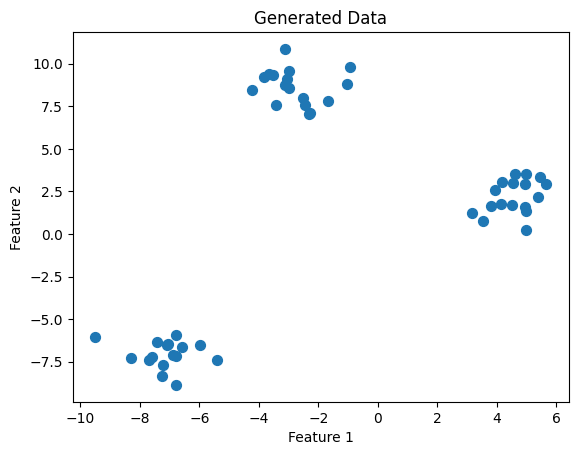

In [2]:
# Generate synthetic data
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Convert to DataFrame for easier handling
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Hierarchical Clustering with Dendrogram

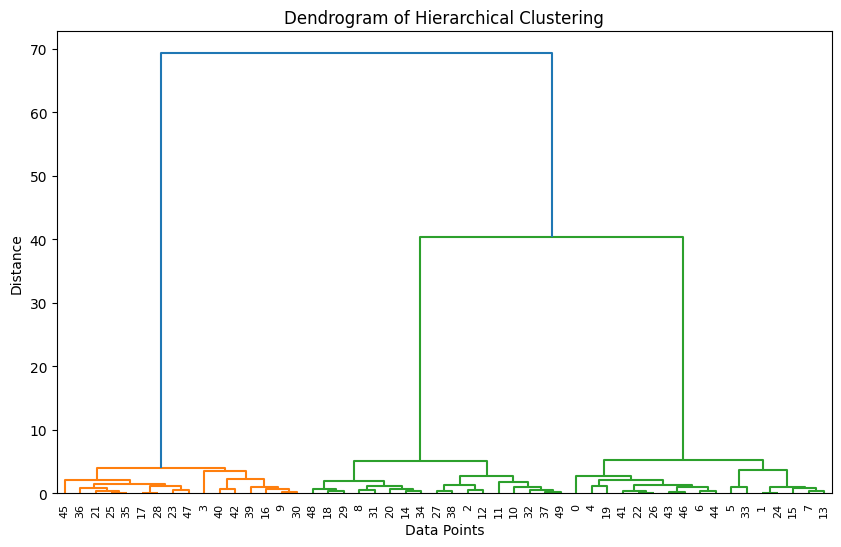

In [3]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


#### Forming Flat Clusters

We can cut the dendrogram at a specific height to form flat clusters. This helps in segmenting the data into distinct groups based on the hierarchical structure.

In [4]:
# Form flat clusters
max_d = 5  # Set the threshold for cutting the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Display the DataFrame with cluster labels
data.head()


,Feature 1,Feature 2,Cluster
0,-3.110904,10.866564,4
1,-2.300334,7.054616,5
2,3.161357,1.253325,3
3,-9.499372,-6.058207,1
4,-3.417222,7.601982,4


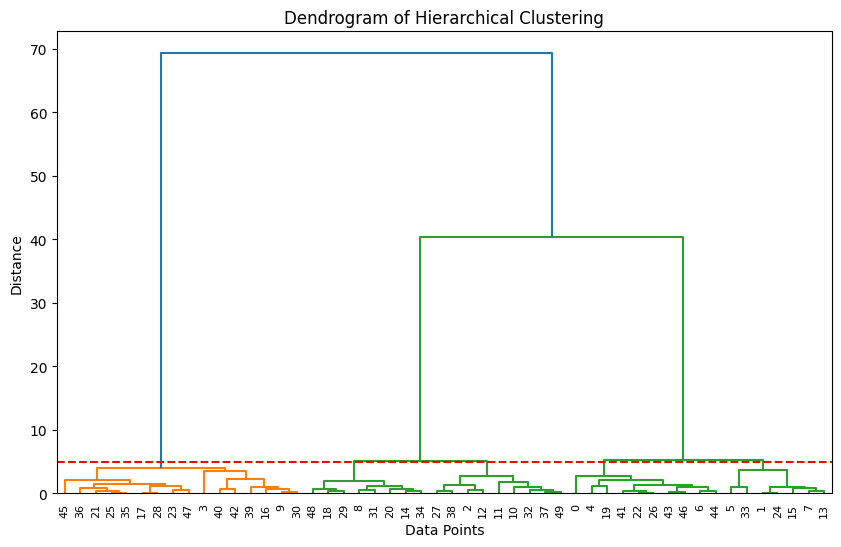

In [5]:
# Step: Plot the Dendrogram Again

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')  # Add a horizontal line for the cut-off
plt.show()


#### Visualizing Clusters with a Heatmap

A heatmap is an effective way to visualize the relationships between the data points and their clusters. We will use the seaborn library to create a heatmap of the data, colored by cluster membership.

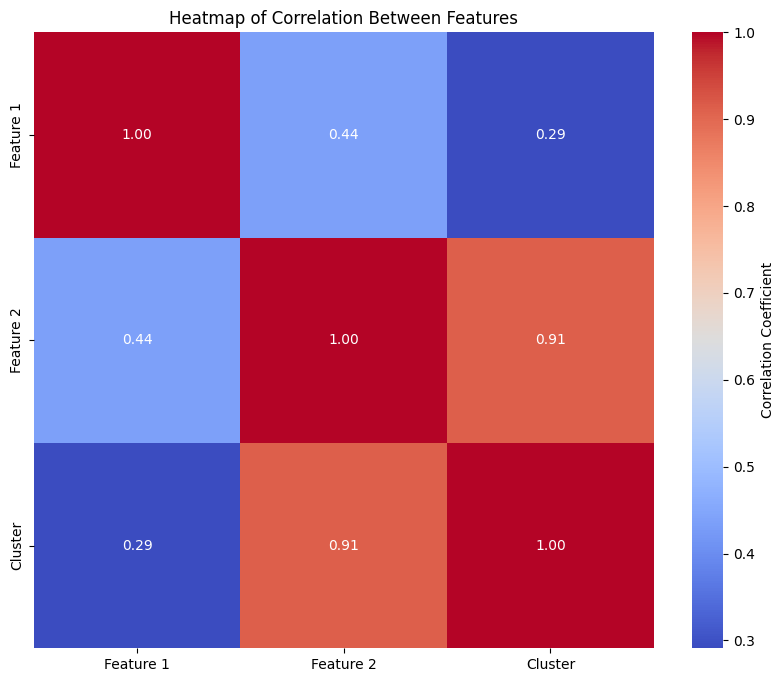

In [6]:
# Create a heatmap of the data, ordered by clusters
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap of Correlation Between Features")
plt.show()


#### Visualizing Clusters in Original Space

To visualize the clusters in the original feature space, we can plot the data points colored by their respective cluster labels.

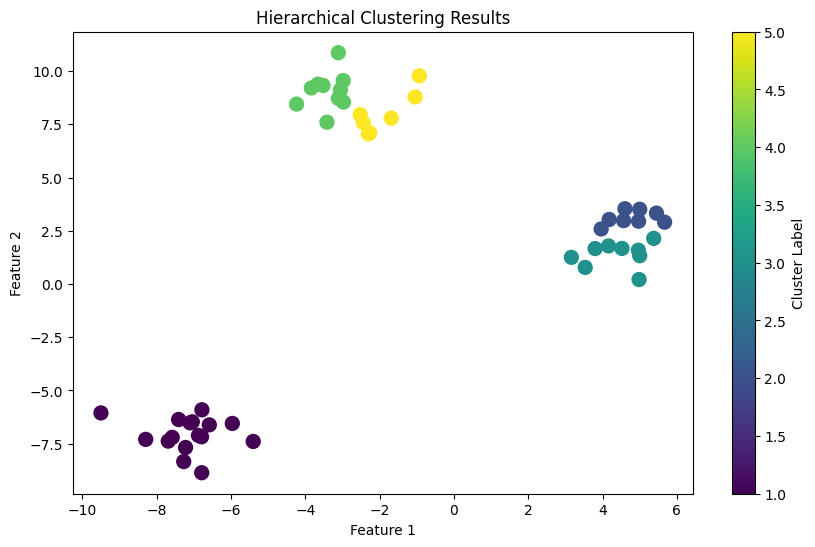

In [7]:
# Plot the clustered data points
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['Cluster'], cmap='viridis', s=100)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()


#### Conclusion

Hierarchical clustering allows us to group similar data points into clusters based on their proximity. By visualizing the clusters using a dendrogram and a heatmap, we can gain insights into the relationships between features and how they influence clustering.